## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [4]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [5]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("Resources/bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [6]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [7]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("Resources/coinbase.csv"),
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

In [8]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [9]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.dropna(inplace=True)

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [10]:
# Use the str.replace function to remove the dollar sign, $
bitstamp['Close'] = bitstamp['Close'].str.replace('$', '', regex=False)

### Step 3: Convert the data type of the Close column to a `float`.

In [11]:
# Convert the Close data type to a float
bitstamp['Close'] = bitstamp['Close'].astype(float)

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [12]:
# Review the data for duplicate values, and drop them if necessary
print(bitstamp.duplicated().sum())
bitstamp.drop_duplicates(inplace=True)

0


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [13]:
# Repeat Steps 1–4 for the coinbase DataFrame
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase.dropna(inplace=True)

# Use the str.replace function to remove the dollar sign, $
coinbase['Close'] = coinbase['Close'].str.replace('$', '', regex=False)

# Convert the Close data type to a float
coinbase['Close'] = coinbase['Close'].astype(float)

# Review the data for duplicate values, and drop them if necessary
print(coinbase.duplicated().sum())
coinbase.drop_duplicates(inplace=True)
display(coinbase.head())

0


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [14]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, ['Close']]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [15]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, ['Close']]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [16]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_summary = bitstamp.describe()
bitstamp_summary

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [17]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_summary = coinbase.describe()
coinbase_summary

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<Axes: title={'center': 'Bitstamp Close Prices'}, xlabel='Timestamp'>

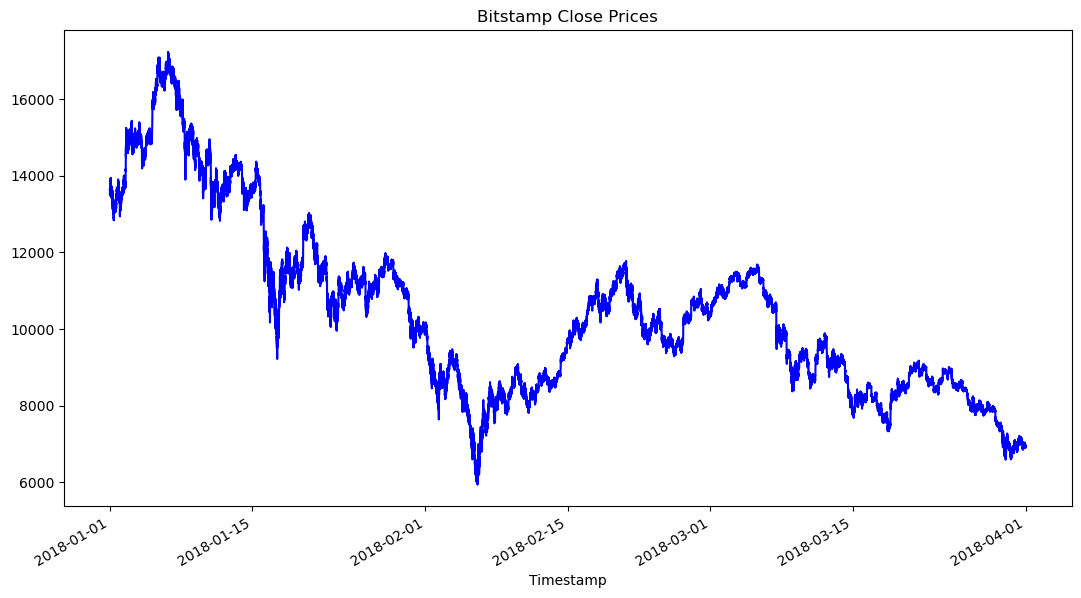

In [18]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp['Close'].plot(figsize=(13, 7), title='Bitstamp Close Prices', color='blue')

<Axes: title={'center': 'Coinbase Close Price'}, xlabel='Timestamp'>

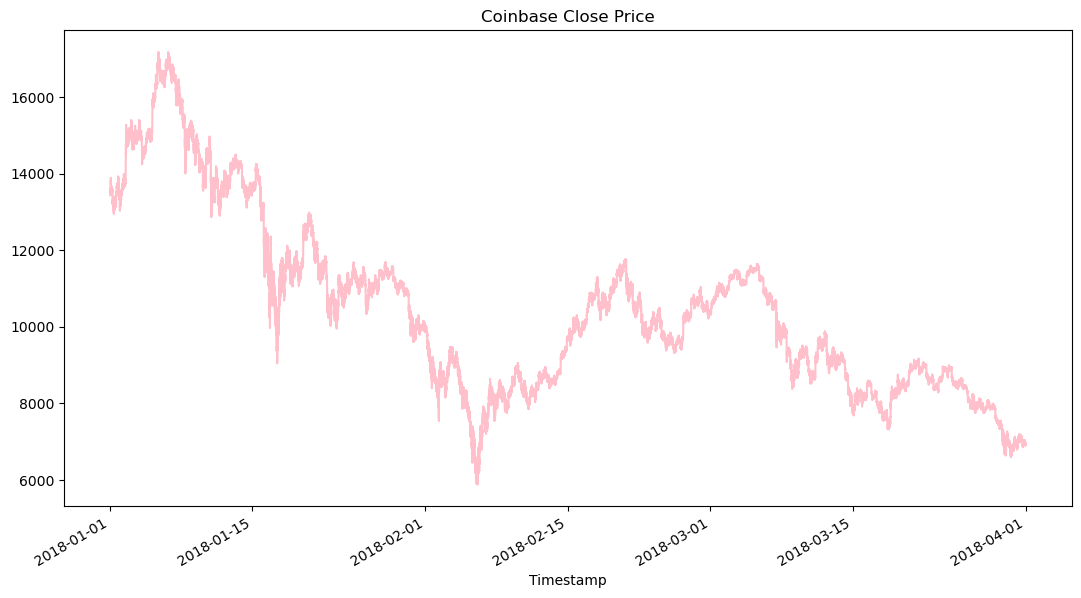

In [19]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase['Close'].plot(figsize=(13, 7), title='Coinbase Close Price', color='pink')

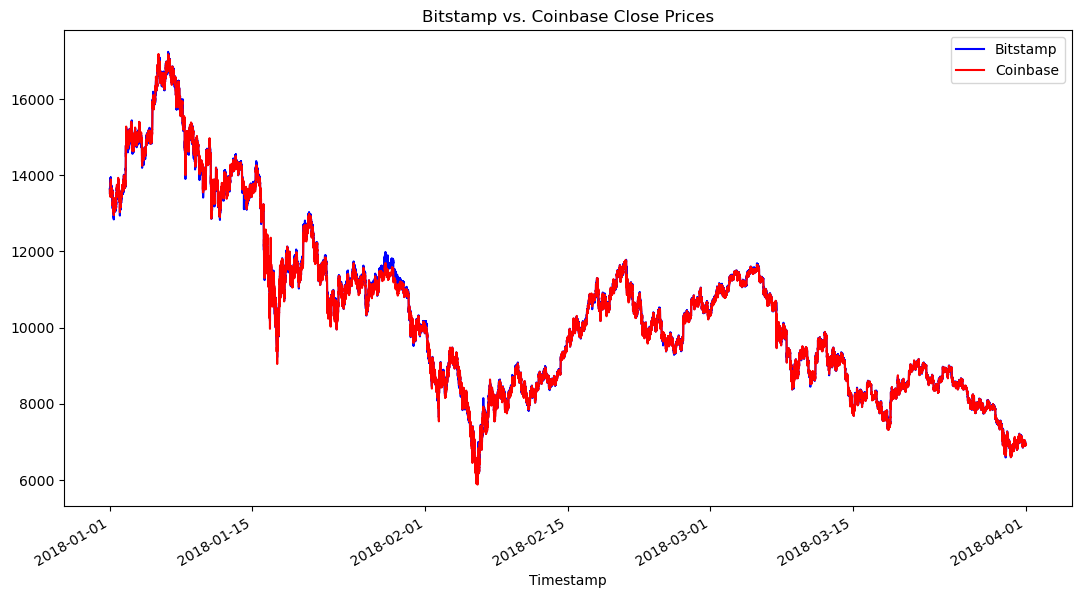

In [20]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ax = bitstamp['Close'].plot(figsize=(13, 7), title='Bitstamp vs. Coinbase Close Prices', color='blue', label='Bitstamp')
coinbase['Close'].plot(ax=ax, color='red', label='Coinbase')
ax.legend()

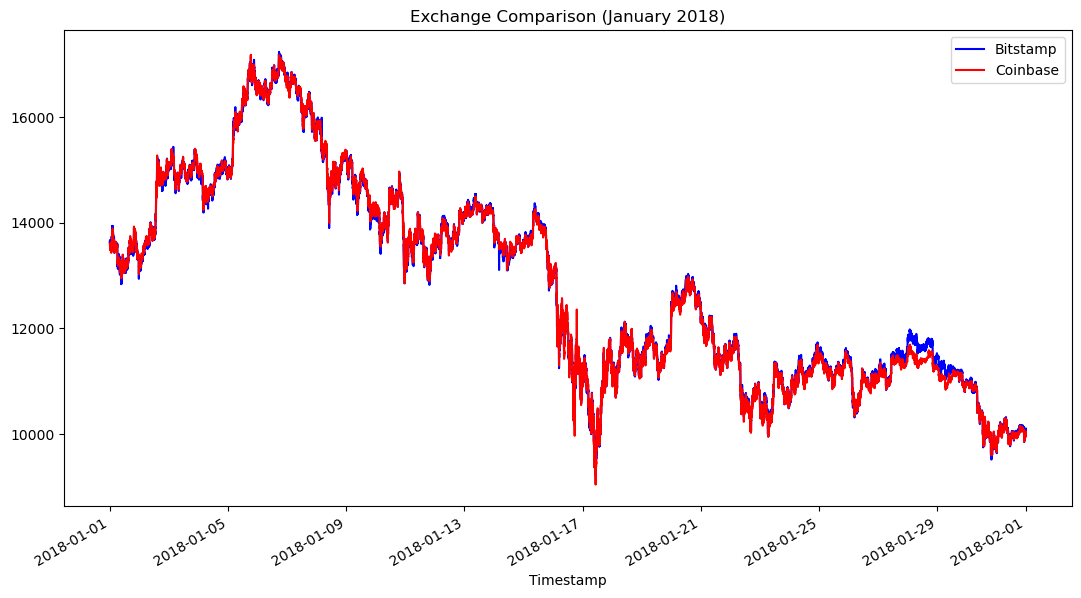

In [21]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
start_date = '2018-01-01'
end_date = '2018-01-31'

ax = bitstamp.loc[start_date:end_date, 'Close'].plot(figsize=(13,7), title='Exchange Comparison (January 2018)', color='blue', label='Bitstamp')
coinbase.loc[start_date:end_date, 'Close'].plot(ax=ax, color='red', label='Coinbase')
ax.legend()

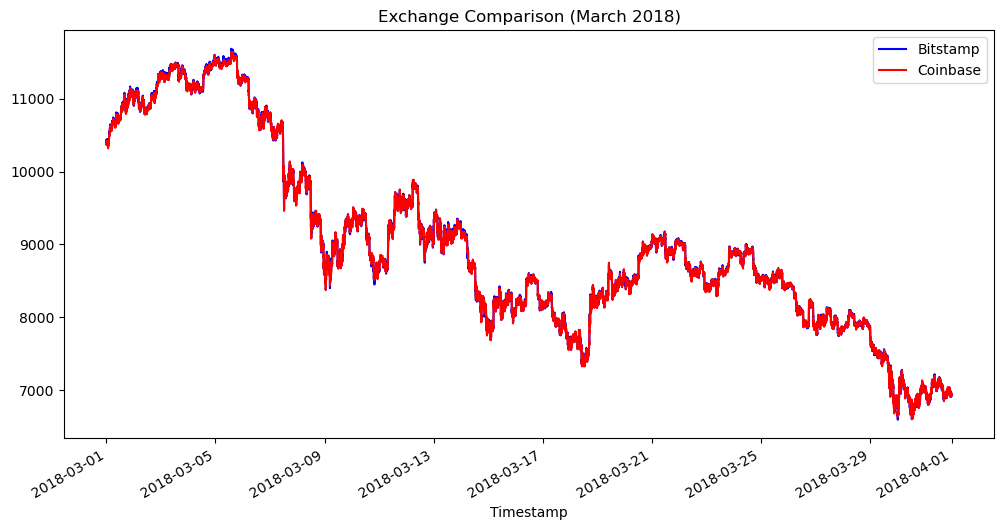

In [22]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
start_date = '2018-03-01'
end_date = '2018-03-31'

ax = bitstamp.loc[start_date:end_date, 'Close'].plot(figsize=(12, 6), title='Exchange Comparison (March 2018)', color='blue', label='Bitstamp')
coinbase.loc[start_date:end_date, 'Close'].plot(ax=ax, color='red', label='Coinbase')
ax.legend()


**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

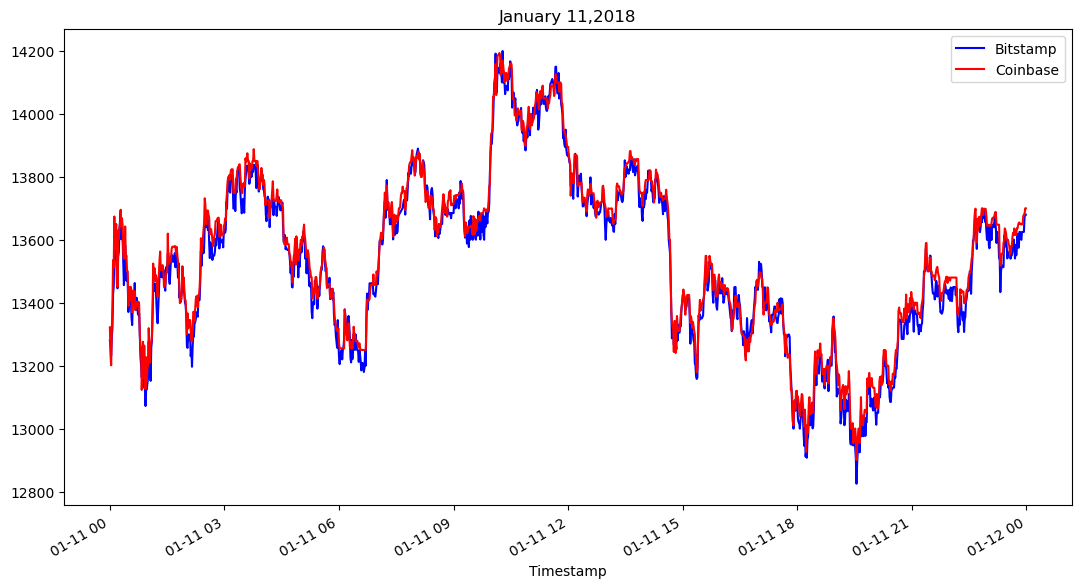

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
start_date = '2018-01-11'
end_date = '2018-01-11'

ax = bitstamp.loc[start_date:end_date, 'Close'].plot(figsize=(13,7), title='January 11,2018', color='blue', label='Bitstamp')
coinbase.loc[start_date:end_date, 'Close'].plot(ax=ax, color='red', label='Coinbase')
ax.legend()

In [24]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase.loc['2018-01-11', 'Close'] - bitstamp.loc['2018-01-11', 'Close']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1434.000000
mean       23.019721
std        29.052228
min       -72.000000
25%         3.767500
50%        23.140000
75%        41.502500
max       130.690000
Name: Close, dtype: float64

<Axes: title={'center': 'Arbitrage Spread - Early Date'}>

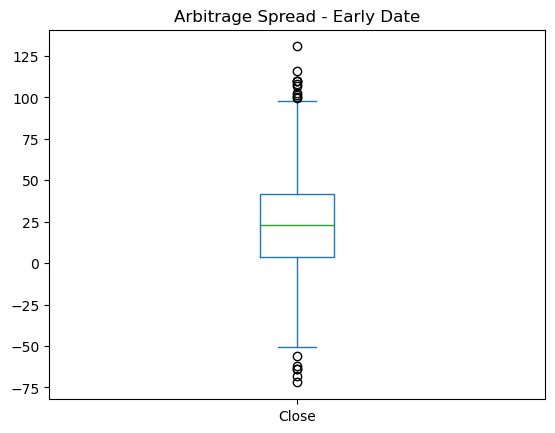

In [25]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box', title='Arbitrage Spread - Early Date')

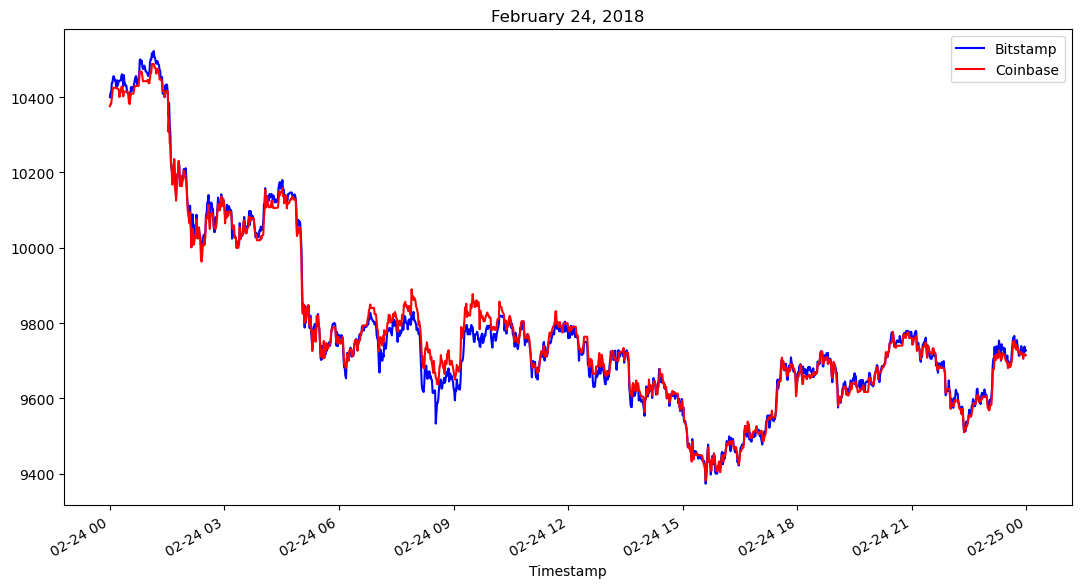

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
start_date = '2018-02-24'
end_date = '2018-02-24'

ax = bitstamp.loc[start_date:end_date, 'Close'].plot(figsize=(13,7), title='February 24, 2018', color='blue', label='Bitstamp')
coinbase.loc[start_date:end_date, 'Close'].plot(ax=ax, color='red', label='Coinbase')
ax.legend()

In [27]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase.loc[start_date:end_date, 'Close'].sub(bitstamp.loc[start_date:end_date, 'Close'])

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

<Axes: title={'center': 'Arbritage Spread - Middle'}>

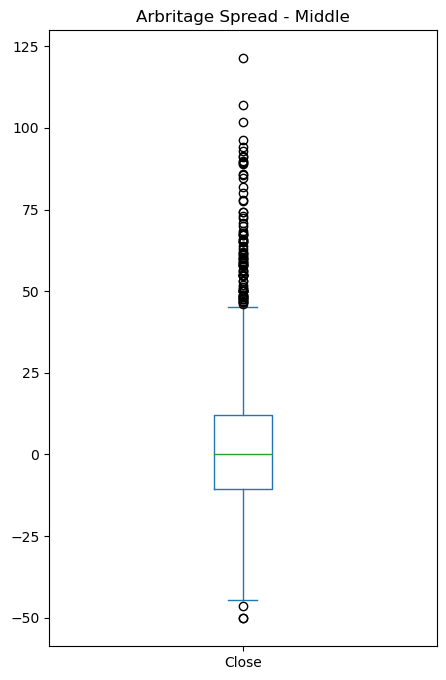

In [28]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', figsize=(5, 8), title='Arbritage Spread - Middle')

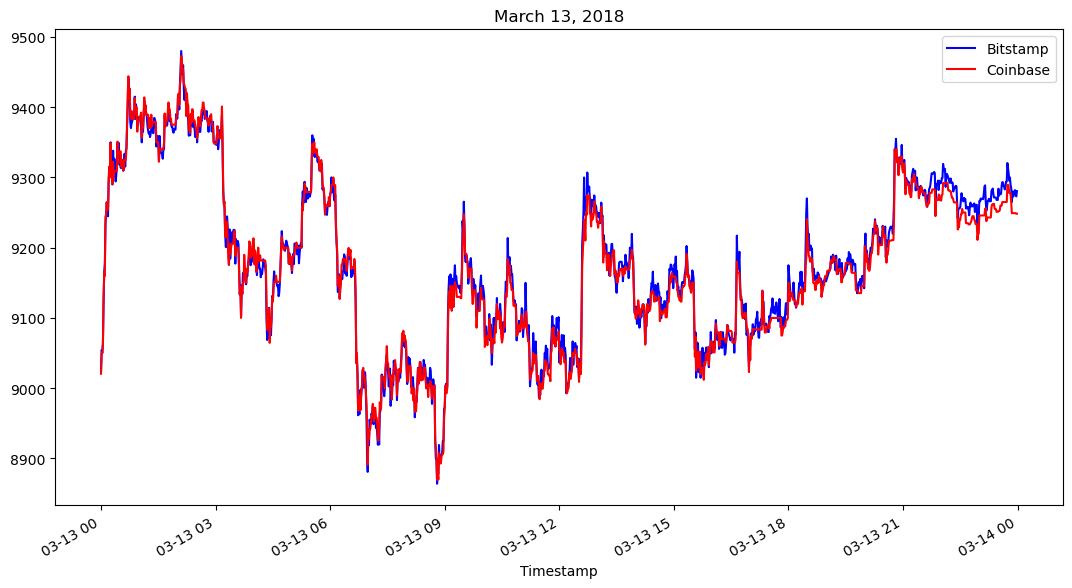

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
start_date = '2018-03-13'
end_date = '2018-03-13'

ax = bitstamp.loc[start_date:end_date, 'Close'].plot(figsize=(13,7), title='March 13, 2018', color='blue', label='Bitstamp')
coinbase.loc[start_date:end_date, 'Close'].plot(ax=ax, color='red', label='Coinbase')
ax.legend()

In [30]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase.loc[end_date, 'Close'] - bitstamp.loc[end_date, 'Close']

# Generate summary statistics for the late DataFrame
late_spread_summary = arbitrage_spread_late.describe()
late_spread_summary

count    1423.000000
mean       -5.111145
std        12.253619
min       -65.000000
25%       -13.365000
50%        -4.660000
75%         3.095000
max        47.270000
Name: Close, dtype: float64

<Axes: title={'center': 'Arbritrage Spread - Late'}>

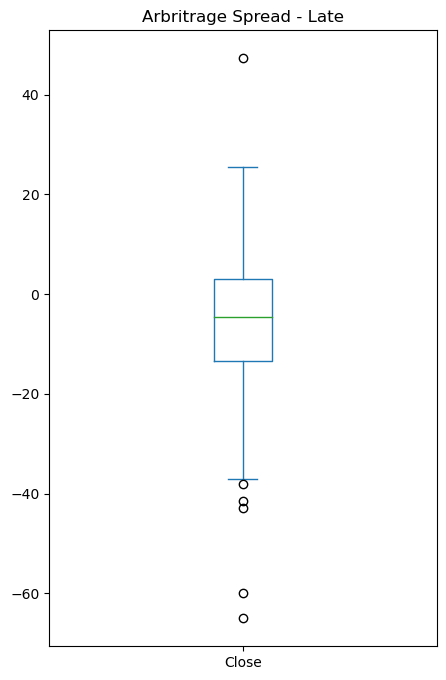

In [31]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', figsize=(5, 8), title='Arbritrage Spread - Late')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [32]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase.loc['2018-01-11', 'Close'] - bitstamp.loc['2018-01-11', 'Close']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
positive_spread_early = arbitrage_spread_early[arbitrage_spread_early > 0]
summary_statistics_early = positive_spread_early.describe()

summary_statistics_early

count    1134.000000
mean       33.543959
std        22.011514
min         0.030000
25%        16.817500
50%        30.385000
75%        46.345000
max       130.690000
Name: Close, dtype: float64

In [33]:
# For the date in the middle of the dataset (2018-02-24), measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase.loc['2018-02-24', 'Close'] - bitstamp.loc['2018-02-24', 'Close']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
positive_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]
summary_statistics_middle = positive_spread_middle.describe()

summary_statistics_middle

count    713.000000
mean      19.880351
std       20.699851
min        0.010000
25%        5.040000
50%       12.330000
75%       27.250000
max      121.320000
Name: Close, dtype: float64

In [34]:
# For the date later in the dataset (2018-03-13), measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_later = coinbase.loc['2018-03-13', 'Close'] - bitstamp.loc['2018-03-13', 'Close']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
positive_spread_later = arbitrage_spread_later[arbitrage_spread_later > 0]
summary_statistics_later = positive_spread_later.describe()

summary_statistics_later

count    490.000000
mean       7.784714
std        6.201435
min        0.010000
25%        2.902500
50%        6.640000
75%       11.387500
max       47.270000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [35]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
positive_spread_early = arbitrage_spread_early[arbitrage_spread_early > 0]
spread_return_early= positive_spread_early / bitstamp.loc['2018-01-11', 'Close']
spread_return_early = spread_return_early.dropna()

# Review the spread return DataFrame
spread_return_early.head()


Timestamp
2018-01-11 00:00:00    0.003130
2018-01-11 00:03:00    0.001511
2018-01-11 00:04:00    0.005446
2018-01-11 00:05:00    0.008061
2018-01-11 00:06:00    0.004371
Name: Close, dtype: float64

In [36]:
# For the date in the middle of the dataset (2018-02-24), calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
positive_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]
spread_return_middle = positive_spread_middle / bitstamp.loc['2018-02-24', 'Close']
spread_return_middle = spread_return_middle.dropna()

# Review the spread return DataFrame for the middle date
spread_return_middle.head()

Timestamp
2018-02-24 00:10:00    0.000123
2018-02-24 00:27:00    0.000189
2018-02-24 00:28:00    0.000487
2018-02-24 01:23:00    0.000574
2018-02-24 01:24:00    0.000163
Name: Close, dtype: float64

In [37]:
# For the date later in the dataset (2018-03-13), calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
positive_spread_later = arbitrage_spread_later[arbitrage_spread_later > 0]
spread_return_later = positive_spread_later / bitstamp.loc['2018-03-13', 'Close']
spread_return_later = spread_return_later.dropna()

# Review the spread return DataFrame for the later date
spread_return_later.head()

Timestamp
2018-03-13 00:03:00    0.000254
2018-03-13 00:04:00    0.000864
2018-03-13 00:07:00    0.001187
2018-03-13 00:09:00    0.000070
2018-03-13 00:10:00    0.000784
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [38]:
# For the date later in the dataset (2018-03-13), calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
profitable_trades_later = spread_return_later[spread_return_later > .01]

# Review the spread return DataFrame for the later date
profitable_trades_later.head()

Series([], Name: Close, dtype: float64)

In [39]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Series([], Name: Close, dtype: float64)

In [40]:
# For the date in the middle of the dataset (2018-02-24), determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades for the middle date
profitable_trades_middle.head()

Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [41]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early = spread_return_early[spread_return_early > 0.01]
summary_statistics_early = profitable_trades_early.describe()

# Middle date
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]
summary_statistics_middle = profitable_trades_middle.describe()

# Later date
profitable_trades_later = spread_return_later[spread_return_later > 0.01]
summary_statistics_later = profitable_trades_later.describe()

# Compare summary statistics among the three dates
summary_statistics_early, summary_statistics_middle, summary_statistics_later

(count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: Close, dtype: float64,
 count    3.000000
 mean     0.011377
 std      0.001199
 min      0.010431
 25%      0.010703
 50%      0.010974
 75%      0.011850
 max      0.012726
 Name: Close, dtype: float64,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: Close, dtype: float64)

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [42]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp.loc['2018-01-11', 'Close']


# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Series([], Name: Close, dtype: float64)

In [43]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp.loc['2018-02-24', 'Close']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the middle profit DataFrame
profit_per_trade_middle.head()

Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    107.00
2018-02-24 09:39:00    101.75
Name: Close, dtype: float64

In [44]:
# For the date later in the dataset, calculate the potential profit per trade in dollars
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_later * bitstamp.loc['2018-03-13', 'Close']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the later profit DataFrame
profit_per_trade_late.head()

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [45]:
# Generate the summary statistics for the early profit per trade DataFrame
early_summary = profit_per_trade_early.describe()

In [47]:
# Plot the results for the early profit per trade DataFrame
if not profit_per_trade_early.empty:
    early_summary = profit_per_trade_early.describe()
    profit_per_trade_early.plot(kind='bar', figsize=(12, 6), title='Early Profit per Trade', color='blue', label='Profit')
else:
    print("No profitable trades for the early date")


No profitable trades for the early date


In [48]:
# Generate the summary statistics for the middle profit per trade DataFrame
middle_summary = profit_per_trade_middle.describe()

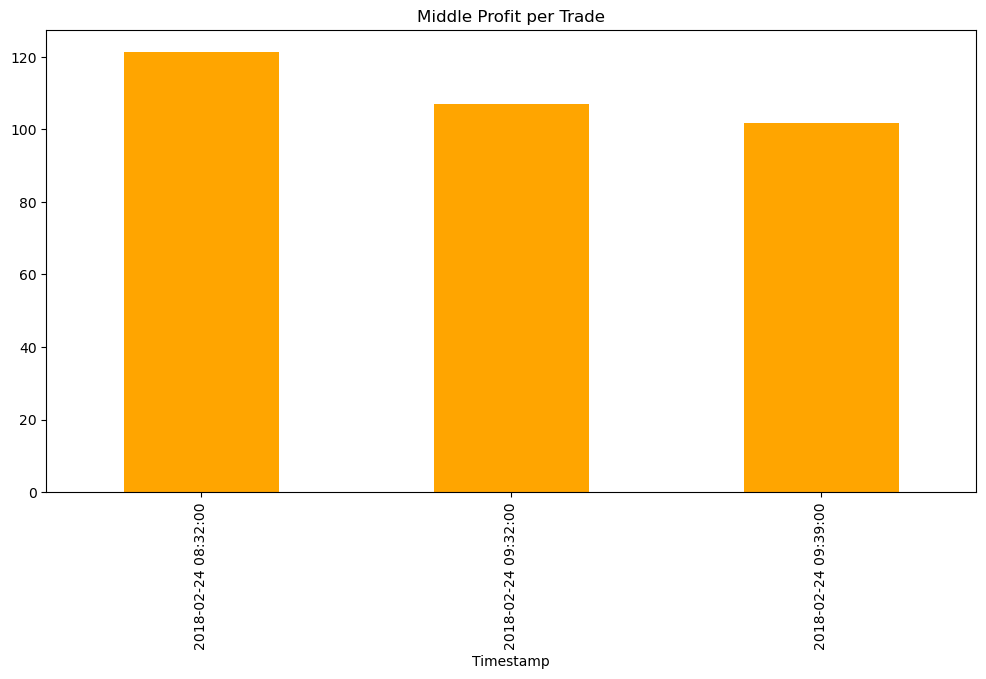

In [49]:
# Plot the results for the middle profit per trade DataFrame
if not profit_per_trade_middle.empty:
    middle_summary = profit_per_trade_middle.describe()
    profit_per_trade_middle.plot(kind='bar', figsize=(12, 6), title='Middle Profit per Trade', color='orange', label='Profit')
else:
    print("No profitable trades for the middle date")


In [50]:
# Generate the summary statistics for the later profit per trade DataFrame
late_summary = profit_per_trade_late.describe()

In [51]:
# Plot the results for the later profit per trade DataFrame
if not profit_per_trade_late.empty:
    late_summary = profit_per_trade_late.describe()
    profit_per_trade_late.plot(kind='bar', figsize=(12, 6), title='Later Profit per Trade', color='green', label='Profit')
else:
    print("No profitable trades for the later date")

No profitable trades for the later date


#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [52]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
potential_profit_early = profit_per_trade_early.sum()
potential_profit_early


0.0

In [53]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
potential_profit_middle = profit_per_trade_middle.sum()
potential_profit_middle


330.0699999999997

In [54]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
potential_profit_later = profit_per_trade_late.sum()
potential_profit_later

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [55]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<Axes: title={'center': 'Cumulative Bitcoin Profits (January 11, 2018)'}, xlabel='Timestamp'>

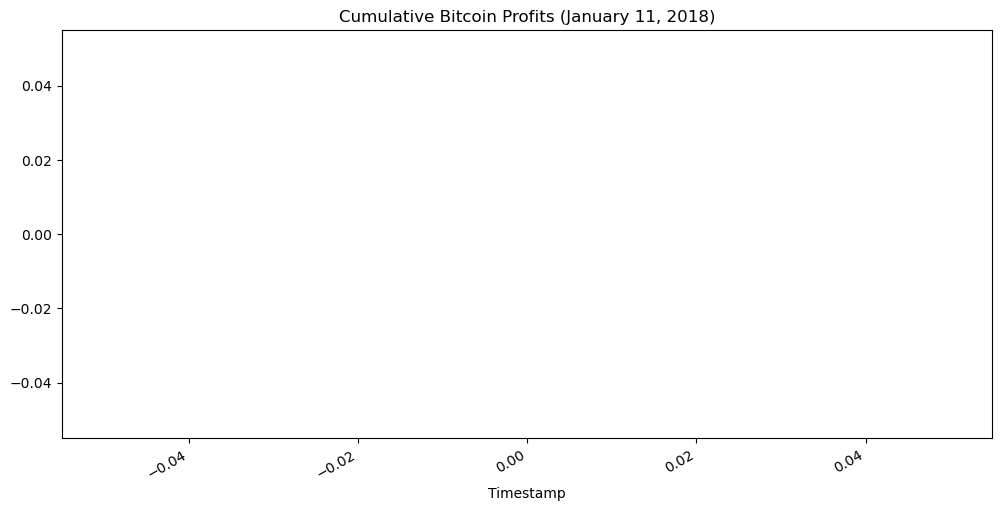

In [56]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(12,6), title='Cumulative Bitcoin Profits (January 11, 2018)', color='blue', label='Profit')

In [57]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()


<Axes: title={'center': 'Cumulative Bitcoin Profits (February 26, 2018)'}, xlabel='Timestamp'>

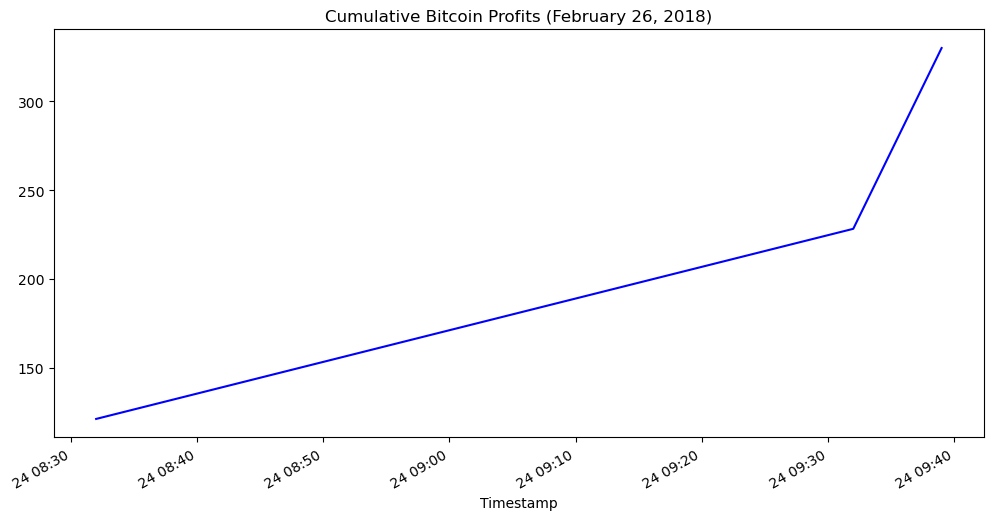

In [61]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(12,6), title='Cumulative Bitcoin Profits (February 26, 2018)', color='blue', label='Profit')

In [62]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_later = profit_per_trade_late.cumsum()

<Axes: title={'center': 'Cumulative Bitcoin Profits (March 13, 2018)'}, xlabel='Timestamp'>

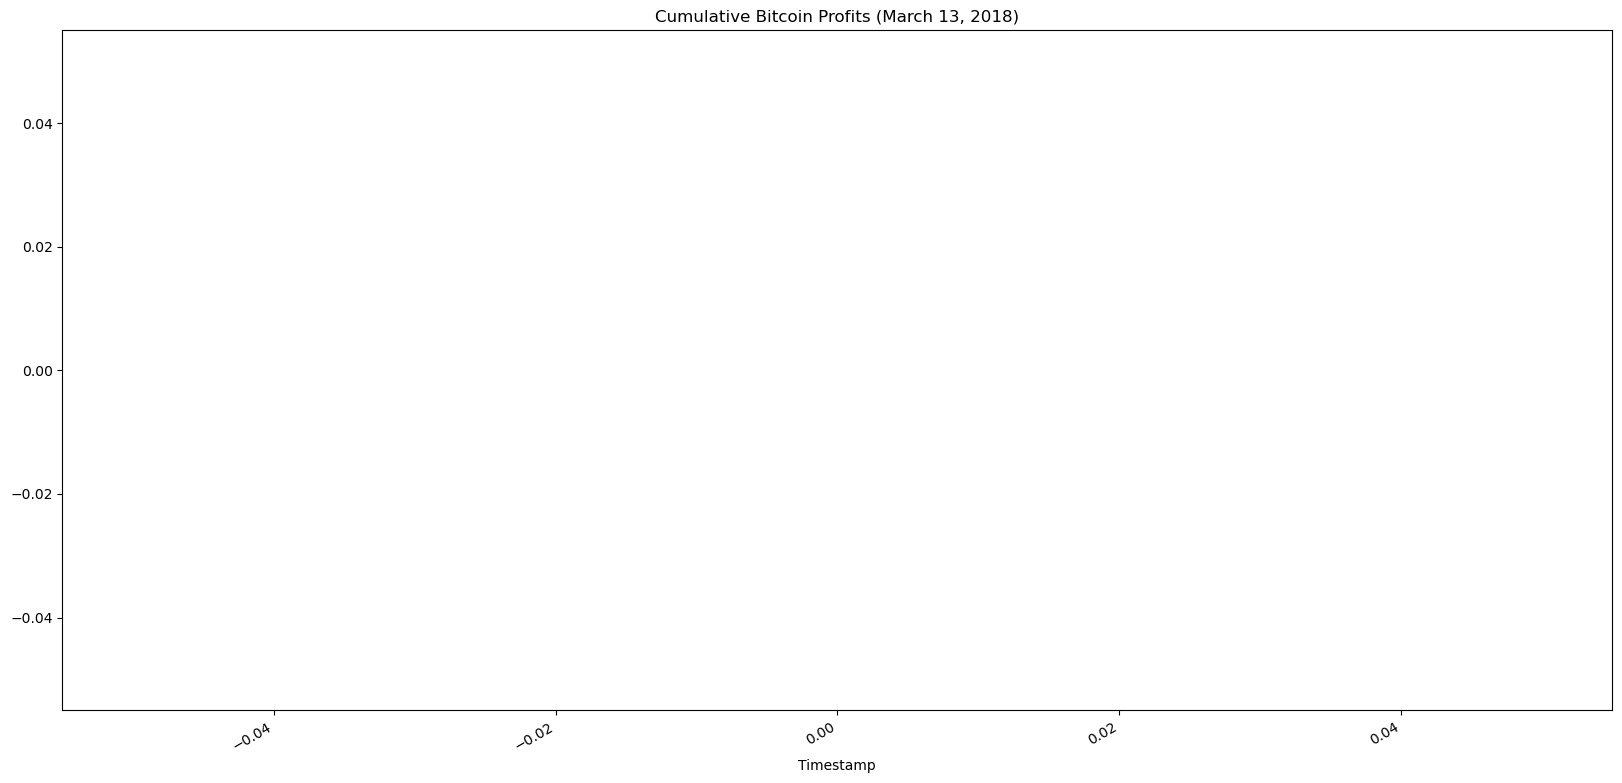

In [64]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_later.plot(figsize=(20,10), title='Cumulative Bitcoin Profits (March 13, 2018)', color='blue', label='Profit')


**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** While I there was notisable differece in the earlier and later period there was a cummulitive profit in bitcoin.  